# Smoothstep function Exploration

<a href="../PearlNoiseProject.ipynb">Back To Main</a>

<a id="top"></a>

**Before we proceed with the explanation of 2D Perlin noise, we will explain the operation of blending (smoothstep) function and its impact.**

The blending function (also known as the interpolation function) is a crucial component in the process of generating Perlin Noise. Its primary purpose is to smoothly combine the random gradient values at different positions in the noise field, creating a continuous and visually appealing pattern.

**The reason for using a blending function in Perlin Noise generation is as follows:**

1. **Smooth transitions**: The blending function ensures smooth transitions between random gradient values, avoiding abrupt changes in the noise pattern. This results in more natural-looking textures and terrains in computer graphics applications.

2. **Elimination of grid artifacts**: Without the blending function, the resulting noise pattern would resemble a grid, with each cell having a distinct and abrupt change in value from its neighbors. This would create visually unappealing artifacts in the final noise pattern. The blending function helps to eliminate these artifacts by interpolating the gradient values smoothly across the grid.

3. **Customizable interpolation**: By using different blending functions, we can customize the interpolation behavior, leading to different types of noise patterns. This flexibility allows us to create a wide variety of textures and patterns in computer graphics applications.

Ken Perlin originally used the Hermite blending function ($3t^2 - 2t^3$) and later suggested using a fifth-degree polynomial for his noise function. The fifth-degree polynomial offers a continuous second derivative, which can be beneficial in computer graphics applications, such as surface displacement and bump mapping.

The fifth-degree polynomial, often referred to as the "smootherstep" function, has the form:

$$f(t) = 6t^5 - 15t^4 + 10t^3$$

This function has the following properties:

1. **Continuity**: Just like the cubic smoothstep function, the smootherstep function is also continuous, ensuring smooth interpolation between values.

2. **First and last value**: Similar to the cubic polynomial, the smootherstep function evaluates to 0 at t=0 and 1 at t=1, which is crucial for interpolating between two values.

3. **Zero first and second derivatives at endpoints**: The first and second derivatives of the smootherstep function are both 0 at t=0 and t=1. This property ensures that the interpolation has a smooth transition at the beginning and end, as well as a continuous second derivative, which is beneficial for surface displacement and bump mapping.

The smootherstep function provides an even smoother interpolation than the cubic smoothstep function. However, it introduces additional computational complexity due to the higher-degree polynomial. The choice between the cubic smoothstep and the smootherstep function depends on the specific requirements of the application and the trade-offs between computational efficiency and smoothness.

The polynomial function ($3t^2 - 2t^3$) is used for the smoothstep function in Perlin noise because of its simplicity and its properties. The smoothstep function serves to smoothly interpolate between values, and this particular polynomial has some desirable characteristics:

1. **Ease of computation**: The polynomial ($3t^2 - 2t^3$) is a cubic polynomial, which is computationally less expensive than higher-order polynomials, such as a 5th-degree polynomial. This makes the algorithm faster and more efficient, which is important in real-time applications like computer graphics and games.

2. **Continuity**: The smoothstep function needs to be continuous, which means there should be no abrupt changes in its value. The cubic polynomial ($3t^2 - 2t^3$) is continuous, ensuring a smooth interpolation between values.

3. **First and last value**: The polynomial evaluates to 0 at t=0 and 1 at t=1, which is essential for interpolation between two values.

4. **Zero first derivative at endpoints**: The first derivative of the polynomial is 0 at t=0 and t=1. This means that the smoothstep function has horizontal tangents at the endpoints, ensuring a smooth transition at the beginning and end of the interpolation.

Higher-order polynomials, such as 5th-degree polynomials, could be used for interpolations for the second and the third derivative. However, they may introduce additional complexity and computational overhead without providing significant improvements in smoothness. The cubic polynomial ($6t^5 - 15t^4 + 10t^3$) is a simple and efficient choice that achieves the desired level of smoothness and continuity for Perlin noise applications.

### Required Libraries

First, let's import the necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Here is a comparison between the cubic smoothstep function ($3t^2 - 2t^3$) and the smootherstep function ($6t^5 - 15t^4 + 10t^3$) with explanations.**

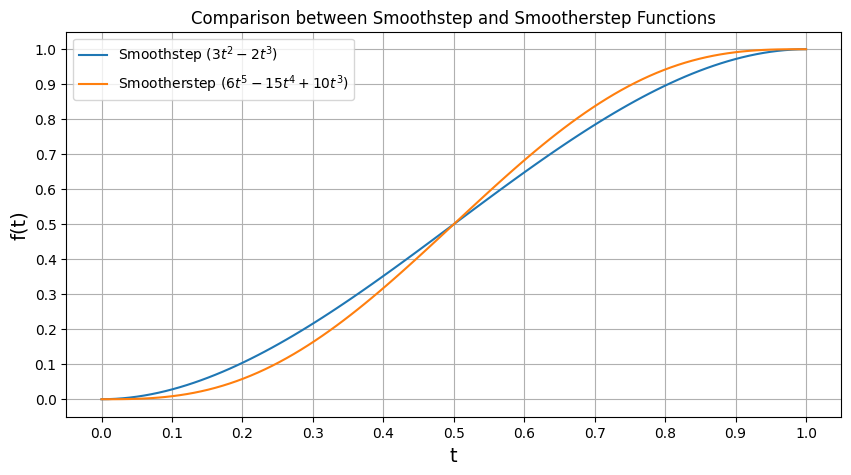

In [2]:
def smoothstep(t):
    return t * t * (3 - 2 * t)

def smootherstep(t):
    return 6 * t**5 - 15 * t**4 + 10 * t**3

t = np.linspace(0, 1, 100)
smoothstep_values = smoothstep(t)
smootherstep_values = smootherstep(t)

plt.figure(figsize=(10, 5))
plt.plot(t, smoothstep_values, label='Smoothstep ($3t^2 - 2t^3$)')
plt.plot(t, smootherstep_values, label='Smootherstep ($6t^5 - 15t^4 + 10t^3$)')
plt.xlabel('t', fontsize=14)
plt.ylabel('f(t)', fontsize=14)
plt.legend()
plt.title('Comparison between Smoothstep and Smootherstep Functions')
plt.grid()
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()


This code generates a comparison plot between the cubic smoothstep function and the smootherstep function. The cubic smoothstep function is defined as:

$$f(t) = 3t^2 - 2t^3$$

And the smootherstep function is defined as:

$$f(t) = 6t^5 - 15t^4 + 10t^3$$

Both functions are continuous and have values of 0 at (`t=0`) and 1 at (`t=1`). However, the smootherstep function provides an even smoother transition between values, as it has a continuous second derivative. This can be observed in the graph generated by the code, where the smootherstep curve appears smoother than the smoothstep curve.

The smootherstep function provides an improvement over the smoothstep function in terms of smoothness, which is particularly beneficial in computer graphics applications such as surface displacement and bump mapping. It is important to have a continuous second derivative for the noise function to ensure smooth transitions and avoid visual artifacts.

The smootherstep function, given by:

$$f(t) = 6t^5 - 15t^4 + 10t^3$$

has a continuous second derivative, which can be calculated as follows:

$$f''(t) = 60t^3 - 60t^2$$

By analyzing the second derivative, we can see that it is zero at both (``t=0``) and (``t=1``), ensuring a smooth transition at the endpoints. The second derivative of the smoothstep function, on the other hand, is not continuous at the endpoints, leading to less smooth transitions.

The smootherstep function provides a more continuous and visually appealing result for computer graphics applications, as it ensures smooth transitions at the endpoints due to its continuous second derivative. The smoothstep function, while still providing decent results, may result in less smooth transitions, which can potentially introduce visual artifacts.

Here's the code for calculating the first and second derivatives of the smoothstep and smootherstep functions, as well as the functions themselves:

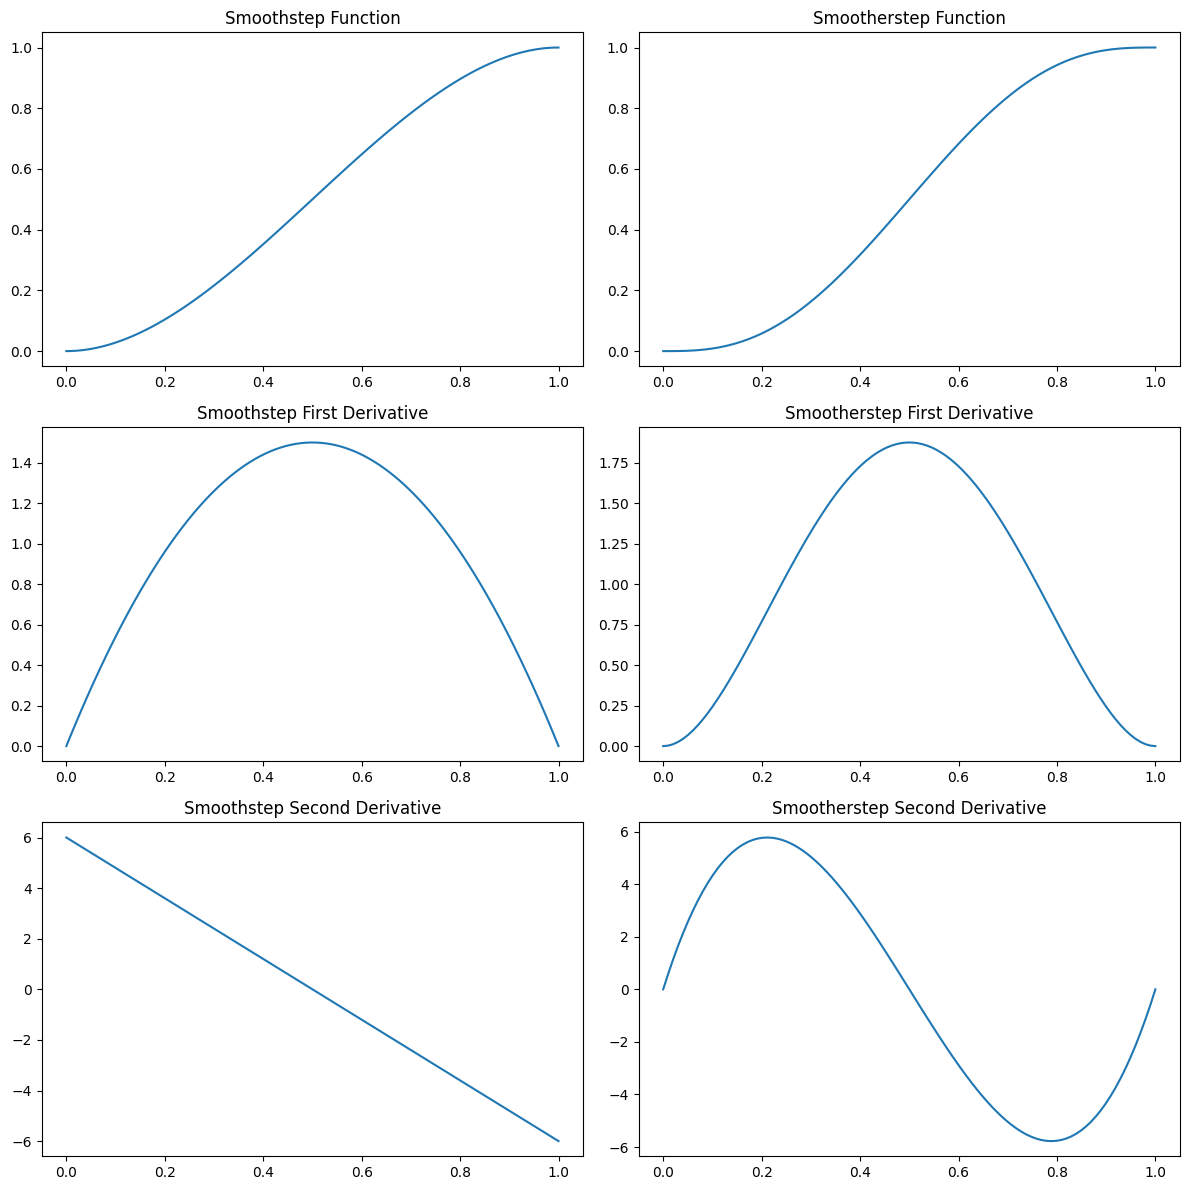

In [3]:
def smoothstep(t):
    return 3 * t**2 - 2 * t**3

def smoothstep_first_derivative(t):
    return 6 * t - 6 * t**2

def smoothstep_second_derivative(t):
    return 6 - 12 * t

def smootherstep(t):
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def smootherstep_first_derivative(t):
    return 30 * t**4 - 60 * t**3 + 30 * t**2

def smootherstep_second_derivative(t):
    return 120 * t**3 - 180 * t**2 + 60 * t

t_values = np.linspace(0, 1, 100)

smoothstep_values = smoothstep(t_values)
smoothstep_first_derivative_values = smoothstep_first_derivative(t_values)
smoothstep_second_derivative_values = smoothstep_second_derivative(t_values)

smootherstep_values = smootherstep(t_values)
smootherstep_first_derivative_values = smootherstep_first_derivative(t_values)
smootherstep_second_derivative_values = smootherstep_second_derivative(t_values)

fig, ax = plt.subplots(3, 2, figsize=(12, 12))
ax[0, 0].plot(t_values, smoothstep_values)
ax[0, 0].set_title('Smoothstep Function')

ax[1, 0].plot(t_values, smoothstep_first_derivative_values)
ax[1, 0].set_title('Smoothstep First Derivative')

ax[2, 0].plot(t_values, smoothstep_second_derivative_values)
ax[2, 0].set_title('Smoothstep Second Derivative')

ax[0, 1].plot(t_values, smootherstep_values)
ax[0, 1].set_title('Smootherstep Function')

ax[1, 1].plot(t_values, smootherstep_first_derivative_values)
ax[1, 1].set_title('Smootherstep First Derivative')

ax[2, 1].plot(t_values, smootherstep_second_derivative_values)
ax[2, 1].set_title('Smootherstep Second Derivative')
plt.tight_layout()
plt.show()

Here is another point of view of comparison at the two functions - the cubic smoothstep $f(t) = 3t^2 - 2t^3$ and the smootherstep function $f(t) = 6t^5 - 15t^4 + 10t^3$ with the first and second derivatives of the functions.

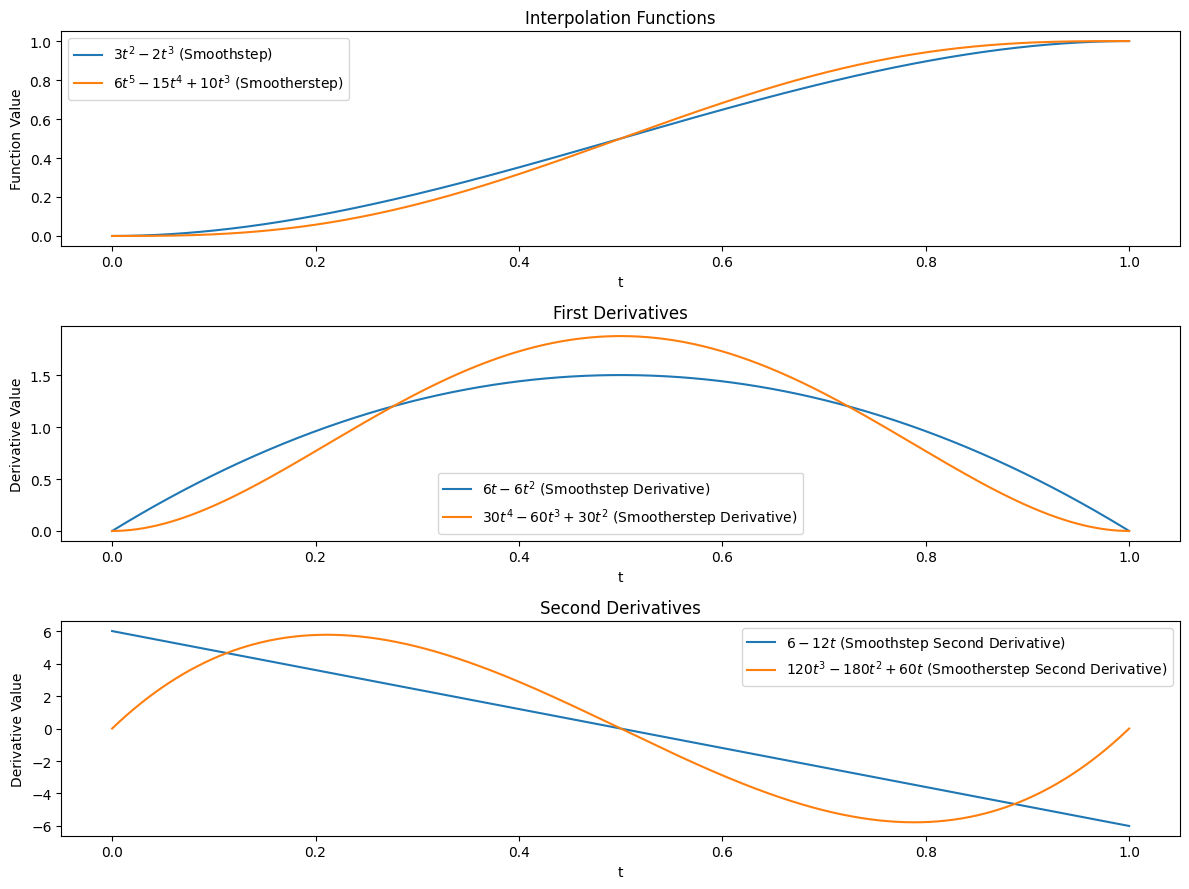

In [4]:
t_values = np.linspace(0, 1, 1000)
smoothstep_values = smoothstep(t_values)
smootherstep_values = smootherstep(t_values)
smoothstep_deriv = smoothstep_first_derivative(t_values)
smootherstep_deriv = smootherstep_first_derivative(t_values)
smoothstep_second_deriv = smoothstep_second_derivative(t_values)
smootherstep_second_deriv = smootherstep_second_derivative(t_values)

plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t_values, smoothstep_values, label=r'$3t^2 - 2t^3$ (Smoothstep)')
plt.plot(t_values, smootherstep_values, label=r'$6t^5 - 15t^4 + 10t^3$ (Smootherstep)')
plt.title('Interpolation Functions')
plt.xlabel('t')
plt.ylabel('Function Value')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t_values, smoothstep_deriv, label=r'$6t - 6t^2$ (Smoothstep Derivative)')
plt.plot(t_values, smootherstep_deriv, label=r'$30t^4 - 60t^3 + 30t^2$ (Smootherstep Derivative)')
plt.title('First Derivatives')
plt.xlabel('t')
plt.ylabel('Derivative Value')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t_values, smoothstep_second_deriv, label=r'$6 - 12t$ (Smoothstep Second Derivative)')
plt.plot(t_values, smootherstep_second_deriv, label=r'$120t^3 - 180t^2 + 60t$ (Smootherstep Second Derivative)')
plt.title('Second Derivatives')
plt.xlabel('t')
plt.ylabel('Derivative Value')
plt.legend()

plt.tight_layout()
plt.show()


In the generated plots, we see that both smoothstep and smootherstep functions are smooth, with smoothstep being a third-degree polynomial and smootherstep being a fifth-degree polynomial. The first derivatives of both functions are continuous, but only the smootherstep function has a continuous second derivative, as its second derivative is zero at the endpoints (`t = 0` and `t = 1`).

**The Smoothstep and Smootherstep functions are defined as:**

- Smoothstep: $f(t) = 3t^2 - 2t^3$
- Smootherstep: $g(t) = 6t^5 - 15t^4 + 10t^3$

**Their respective first derivatives are:**

- Smoothstep first derivative: $f'(t) = 6t - 6t^2$
- Smootherstep first derivative: $g'(t) = 30t^4 - 60t^3 + 30t^2$

**The second derivatives are:**

- Smoothstep second derivative: $f''(t) = 6 - 12t$
- Smootherstep second derivative: $g''(t) = 120t^3 - 180t^2 + 60t$

By plotting the functions and their derivatives, we can observe how the interpolation functions affect the smoothness of the Perlin noise. As we saw, the Smoothstep function has continuous first derivatives, while the Smootherstep function has continuous first and second derivatives. This means that the Smootherstep function provides a smoother transition between the noise values and is better suited for tasks like surface displacement and bump mapping in computer graphics.

**Now that we have explained how smoothstep and smootherstep functions affect Perlin Noise, we will illustrate this with the graph:**

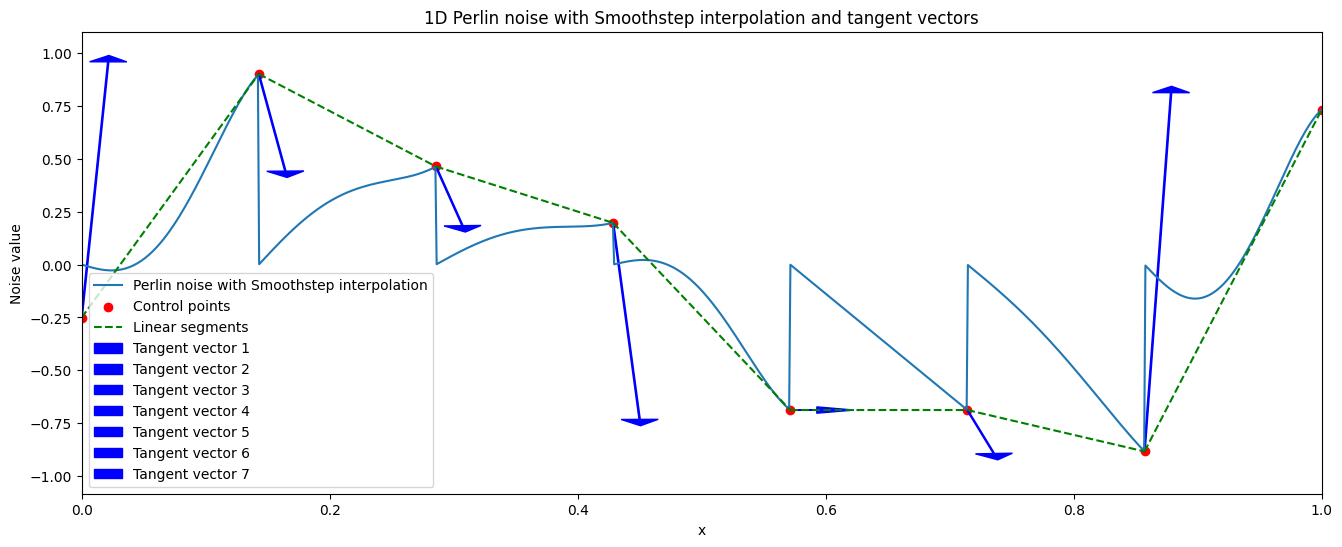

In [5]:
def perlin_noise_1d(control_points, interpolation_func):
    x_coords = np.linspace(0, 1, len(control_points))
    x_eval = np.linspace(0, 1, 1000)
    noise_eval = np.zeros_like(x_eval)

    for i in range(len(control_points) - 1):
        t = (x_eval - x_coords[i]) / (x_coords[i+1] - x_coords[i])
        t = np.where((t >= 0) & (t <= 1), t, 0)

        noise_eval += t * (interpolation_func(t) * (control_points[i+1] - control_points[i]) + control_points[i])

    return x_eval, noise_eval

np.random.seed(42)
control_points = np.random.uniform(-1, 1, size=8)
x_eval, noise_eval = perlin_noise_1d(control_points, smoothstep)

fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(x_eval, noise_eval, label="Perlin noise with Smoothstep interpolation")
ax.scatter(np.linspace(0, 1, len(control_points)), control_points, color="red", label="Control points")

for i in range(len(control_points) - 1):
    ax.plot([i / (len(control_points) - 1), (i+1) / (len(control_points) - 1)], [control_points[i], control_points[i+1]], color="green", linestyle="--", label="Linear segments" if i == 0 else "")

vector_scale = 0.15
for i in range(len(control_points) - 1):
    tangent = (control_points[i+1] - control_points[i]) / (1 / (len(control_points) - 1))
    ax.arrow((i / (len(control_points) - 1)), control_points[i], (1 / (len(control_points) - 1)) * vector_scale, tangent * vector_scale, head_width=0.03, head_length=0.03, fc='blue', ec='blue', label=f"Tangent vector {i+1}")

ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("Noise value")
ax.set_title("1D Perlin noise with Smoothstep interpolation and tangent vectors")
ax.set_xlim(0, 1)
ax.set_ylim(min(control_points) - 0.2, max(control_points) + 0.2)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()


In this example, the control points (`red dots`) represent the noise values, and the blue arrows represent the tangent vectors at the control points. The curve represents the Perlin noise generated using the Smoothstep interpolation function, demonstrating how the noise values are smoothly connected by the interpolation function.

The tangent vectors at the control points influence the shape of the Perlin noise by determining the direction and rate of change of the noise at these points. 

In the 1D Perlin noise generation process, we interpolate between the control points using the smoothstep function. The tangent vectors represent the derivatives (`slopes`) of the noise function at the control points, and they are used to ensure a smooth transition between the segments.

When creating the Perlin noise, we calculate the interpolated noise value at each evaluation point by considering the contributions from both adjacent control points. The tangent vector at each control point affects the curvature of the resulting noise function by "`pulling`" or "`pushing`" it in the direction of the vector.

In the code above, the tangent vectors are visualized as blue arrows at the control points. The length of the arrows represents the magnitude of the tangent vector, while the direction of the arrows indicates the direction of the noise's rate of change at the control points.

The tangent vectors play a crucial role in shaping the Perlin noise by defining the direction and rate of change at the control points, ensuring smooth transitions between the segments and contributing to the overall smoothness of the noise function.

<a href="../PearlNoiseProject.ipynb">Back To Main</a>

<a href="#top">Top</a>

---

## Conclusion

The use of a smoothing or interpolation function in Perlin noise is crucial for creating a continuous and visually appealing output. It is the key differentiator between Perlin noise and simple random noise. The smoothing function ensures a gradual transition between the noise values, resulting in a more natural and coherent pattern. Here's a summary of why a smoothing function is essential for Perlin noise:

1. **Continuity**: Perlin noise is designed to produce continuous noise, which means that the output values should change smoothly and gradually from one point to another. A smoothing function, such as the smoothstep function, is used to interpolate between the dot products of the gradients and distances, ensuring that the resulting noise is continuous across the entire domain.

2. **Visual appeal**: When generating procedural textures or terrains, it is often desirable to have smooth transitions between different features to create realistic and visually pleasing results. By using a smoothing function in Perlin noise, abrupt changes in the output values are minimized, leading to more aesthetically pleasing patterns.

3. **Elimination of artifacts**: Simple random noise can produce noticeable artifacts, such as grid alignment and repetition, which are undesirable in many applications. Perlin noise, on the other hand, uses a smoothing function to blend the contributions from nearby points, reducing the visibility of these artifacts and producing a more seamless pattern.

4. **Customizability**: The choice of smoothing function can impact the characteristics of the Perlin noise. By choosing different interpolation functions, we can control the smoothness and the overall appearance of the noise, making it adaptable to various applications and desired outcomes.

Using of a smoothing function in Perlin noise is vital for creating continuous, visually appealing, and customizable patterns. The smooth transitions it provides, along with the reduction of artifacts, make Perlin noise a powerful tool for generating coherent and natural-looking textures, terrains, and other procedural content.

<a href="../PearlNoiseProject.ipynb">Back To Main</a>

<a href="#top">Top</a>

---